In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import plotly.express as px


In [2]:
# Taylor Swift Album Sales Data
data_TS_1 = pd.read_csv('./dataset/Taylor_Swift_albumsales.csv')
data_TS_1

,Album,Year,Continent,Country,Sales,Pure_sales_index
0,Taylor Swift,2006,Asia,Afghanistan,42.0,0.042
1,Taylor Swift,2007,Asia,Afghanistan,27.0,0.027
2,Taylor Swift,2008,Asia,Afghanistan,27.0,0.027
3,Taylor Swift,2009,Asia,Afghanistan,29.0,0.029
4,Taylor Swift,2010,Asia,Afghanistan,34.0,0.034
...,...,...,...,...,...,...
8275,Evermore,2021,South America,Peru,200.0,0.200
8276,Evermore,2020,South America,Uruguay,53.0,0.053
8277,Evermore,2021,South America,Uruguay,49.0,0.049
8278,Evermore,2020,South America,Venezuela,700.0,0.700


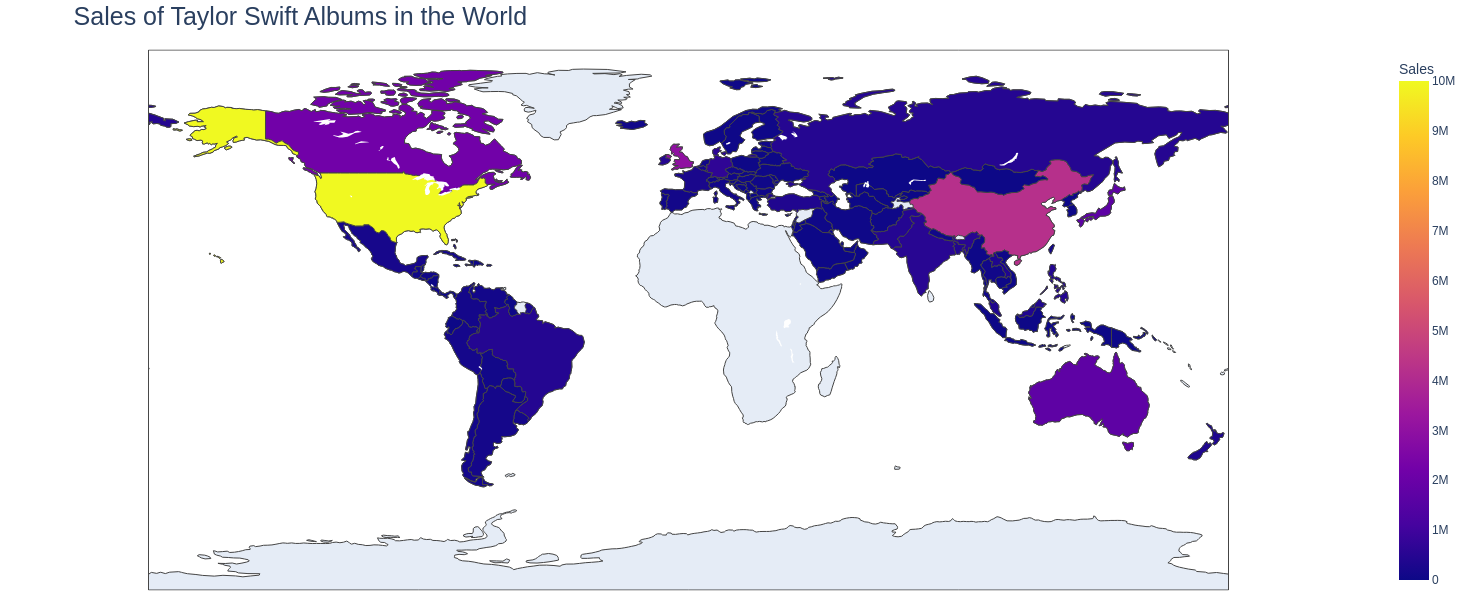

In [3]:
# static country plot all time
static_country_plot = data_TS_1[['Country', 'Sales']]

# sum of sales in each country
static_country_plot = static_country_plot.groupby('Country').sum().reset_index()

# Create the world map plot using Plotly
fig1_pop = px.choropleth(static_country_plot, 
                    locations="Country", 
                    locationmode="country names", 
                    color="Sales", 
                    range_color=[0, 1e7],
                    title="Sales of Taylor Swift Albums in the World"
                   )
fig1_pop.update_layout(
    # height=400,
    title_font=dict(size=25),
    height=600,
    margin=dict(l=15, r=15, t=50, b=10, pad=0)
)

fig1_pop.show()

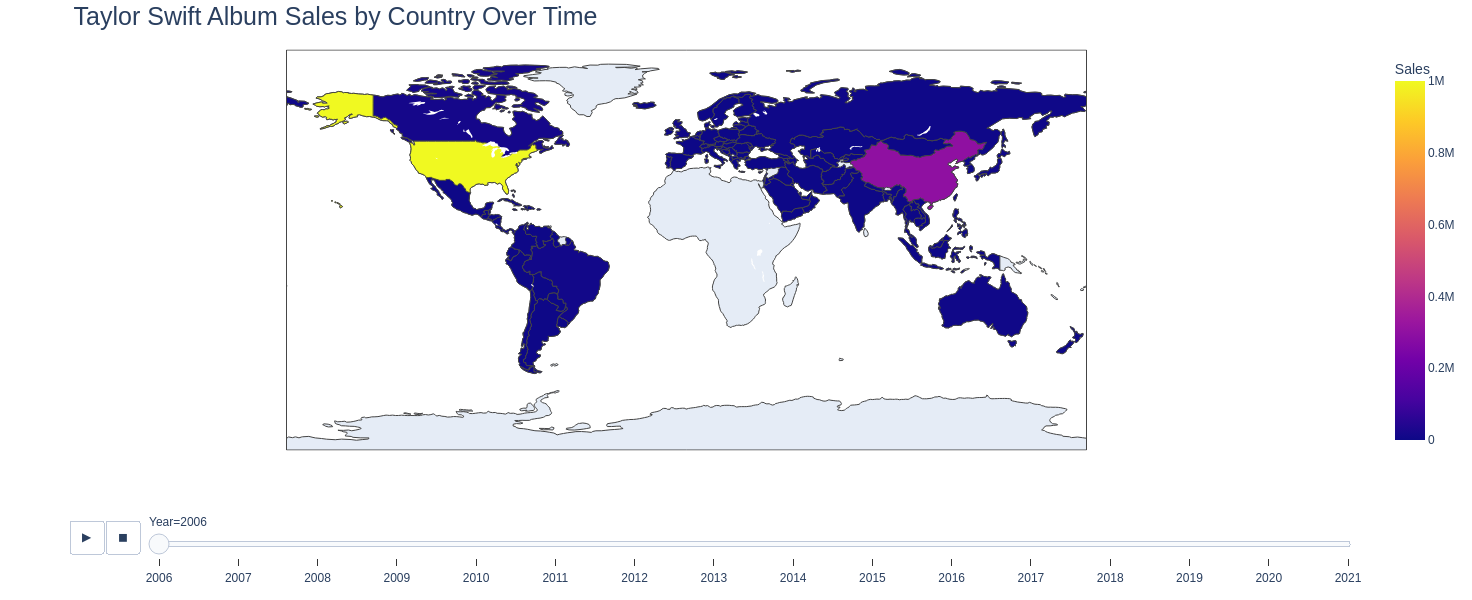

In [4]:
# extract country wise data
# Year Country Sales
map_country_time_anim = data_TS_1[['Year', 'Country', 'Sales']]
# sum over all elements with same country and year
map_country_time_anim = map_country_time_anim.groupby(['Year', 'Country']).sum().reset_index()

# time animated world map
fig = px.choropleth(map_country_time_anim, 
                    locations="Country",
                    color="Sales", 
                    hover_name="Country", 
                    range_color=[0, 1e6],
                    locationmode="country names",
                    animation_frame="Year",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Taylor Swift Album Sales by Country Over Time")

fig.update_layout(
    title_font=dict(size=25),
    height=600,
    margin=dict(l=15, r=15, t=50, b=10, pad=0)
)


# Update layout
fig.update_layout(geo=dict(showcoastlines=True))

# Show the figure
fig.show()


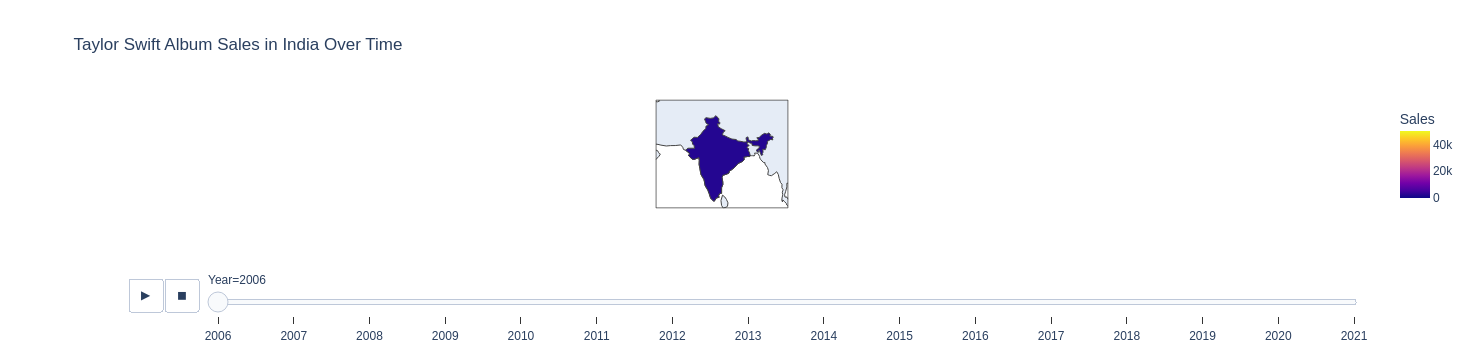

In [5]:
# time animated plot for india
fig = px.choropleth(map_country_time_anim[map_country_time_anim['Country'] == 'India'], 
                    locations="Country",
                    color="Sales", 
                    hover_name="Country", 
                    range_color=[0, 5e4],
                    locationmode="country names",
                    animation_frame="Year",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Taylor Swift Album Sales in India Over Time")

# zoom in to india
fig.update_geos(projection_type="orthographic", 
                lataxis_range=[5, 40], 
                lonaxis_range=[60, 100])

# Update layout
fig.update_layout(geo=dict(showcoastlines=True))

# Show the figure
fig.show()

In [6]:
# Taylor Swift Concerts Data
data_MJ_1 = pd.read_csv('./dataset/Michael_Jackson_albumsales.csv')
data_MJ_1

,Album,Country,Sales
0,Thriller,Argentina,600000
1,Thriller,Australia,1150000
2,Thriller,Austria,400000
3,Thriller,Belgium,315000
4,Thriller,Brazil,430000
...,...,...,...
171,Invincible,Sweden,40000
172,Invincible,Switzerland,40000
173,Invincible,United Kingdom,300000
174,Invincible,United States,2097000


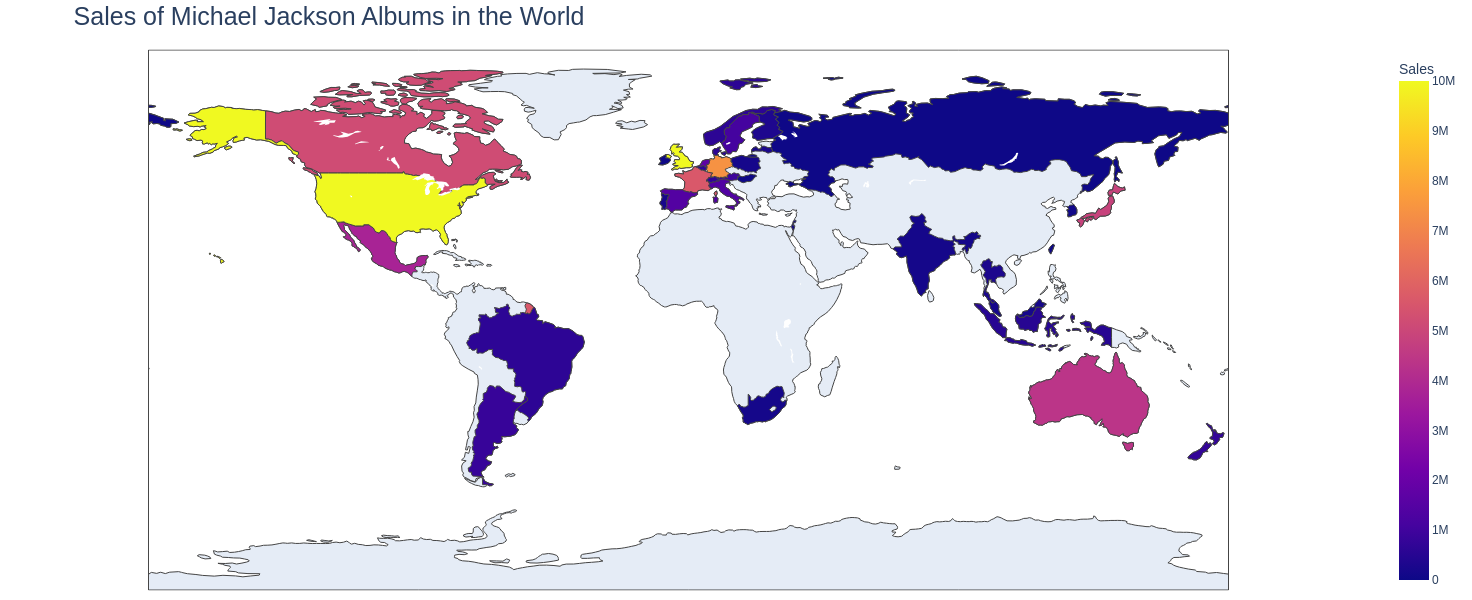

In [7]:
# static country plot all time
static_country_plot = data_MJ_1[['Country', 'Sales']]

# sum of sales in each country
static_country_plot = static_country_plot.groupby('Country').sum().reset_index()

# Create the world map plot using Plotly
fig1_pop = px.choropleth(static_country_plot, 
                    locations="Country", 
                    locationmode="country names", 
                    color="Sales", 
                    range_color=[0, 1e7],
                    title="Sales of Michael Jackson Albums in the World"
                   )
fig1_pop.update_layout(
    # height=400,
    title_font=dict(size=25),
    height=600,
    margin=dict(l=15, r=15, t=50, b=10, pad=0)
)

fig1_pop.show()

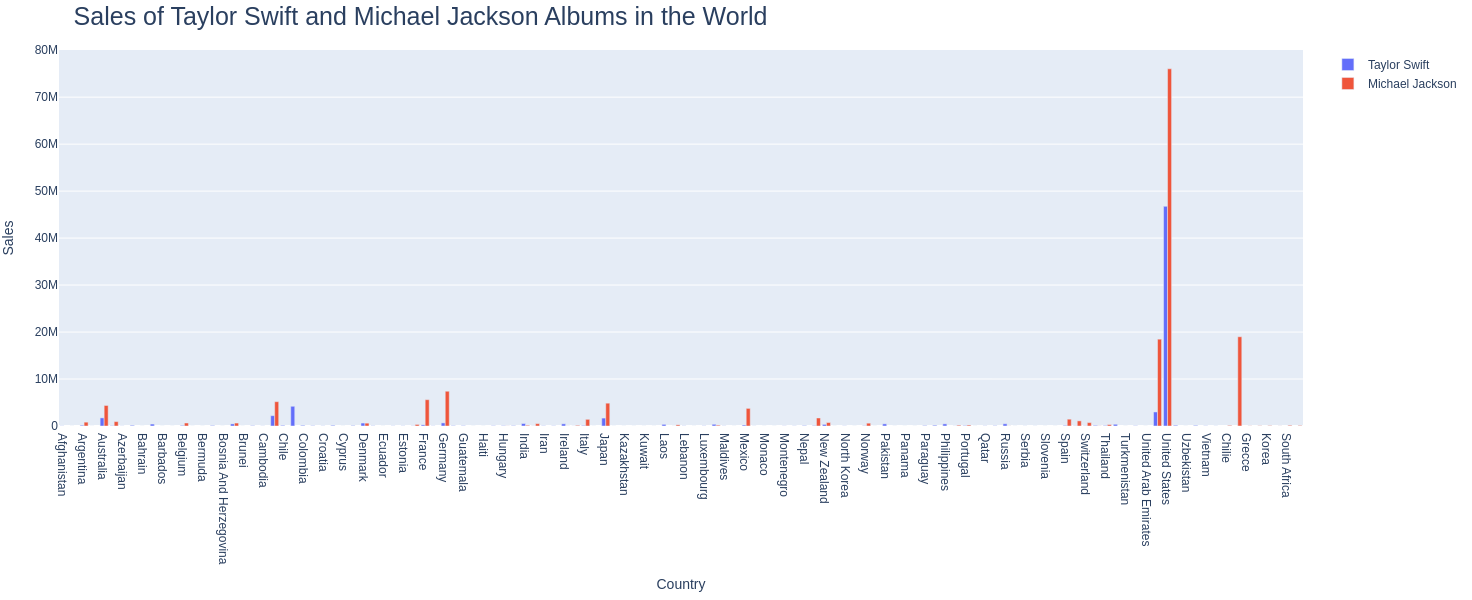

In [8]:
# static plot to compare country wise total sales of Taylor Swift and Michael Jackson

# sum of sales in each country
static_country_plot_TS = data_TS_1[['Country', 'Sales']]
static_country_plot_TS = static_country_plot_TS.groupby('Country').sum().reset_index()
static_country_plot_MJ = data_MJ_1[['Country', 'Sales']]
static_country_plot_MJ = static_country_plot_MJ.groupby('Country').sum().reset_index()

# Create the world map plot using Plotly
fig1_pop = go.Figure()
fig1_pop.add_trace(go.Bar(x=static_country_plot_TS['Country'], y=static_country_plot_TS['Sales'], name='Taylor Swift'))
fig1_pop.add_trace(go.Bar(x=static_country_plot_MJ['Country'], y=static_country_plot_MJ['Sales'], name='Michael Jackson'))

fig1_pop.update_layout(
    title="Sales of Taylor Swift and Michael Jackson Albums in the World",
    xaxis_title="Country",
    yaxis_title="Sales",
    title_font=dict(size=25),
    height=600,
    margin=dict(l=15, r=15, t=50, b=10, pad=0)
)

fig1_pop.show()

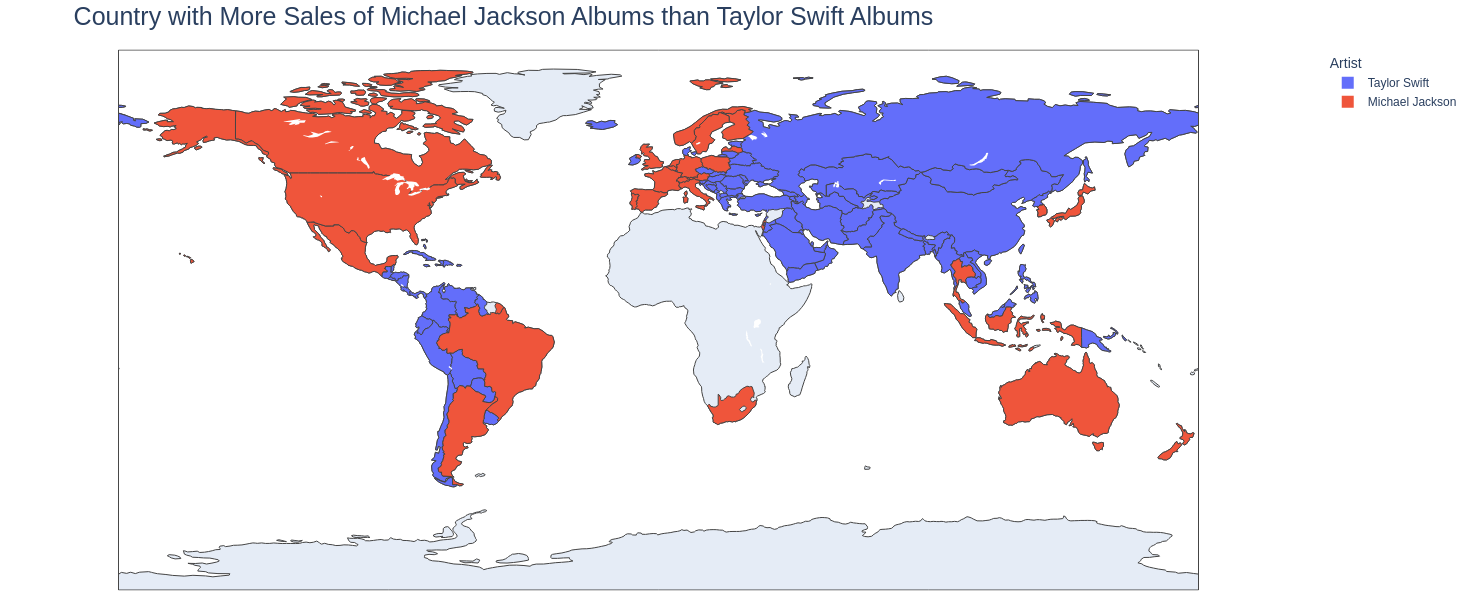

In [16]:
# show it on map
# pd['val']=1 => MJ has more sales
# pd['val']=0 => TS has more sales
# new pd with country and val
static_compare_country_plot = pd.DataFrame(columns=['Country', 'Artist'])

# for same country, if MJ has more sales, val=1, else val=0
for index, row in static_country_plot_TS.iterrows():
    country = row['Country']
    sales_TS = row['Sales']
    sales_MJ = static_country_plot_MJ[static_country_plot_MJ['Country'] == country]['Sales'].values
    if len(sales_MJ) == 0:
        static_compare_country_plot = pd.concat([static_compare_country_plot, pd.DataFrame({'Country': [country], 'Artist': ['Taylor Swift']})])
        continue
    sales_MJ = sales_MJ[0]
    if sales_MJ > sales_TS:
        static_compare_country_plot = pd.concat([static_compare_country_plot, pd.DataFrame({'Country': [country], 'Artist': ['Michael Jackson']})])
    else:
        static_compare_country_plot = pd.concat([static_compare_country_plot, pd.DataFrame({'Country': [country], 'Artist': ['Taylor Swift']})])

for index, row in static_country_plot_MJ.iterrows():
    country = row['Country']
    sales_MJ = row['Sales']
    sales_TS = static_country_plot_TS[static_country_plot_TS['Country'] == country]['Sales'].values
    if len(sales_TS) == 0:
        static_compare_country_plot = pd.concat([static_compare_country_plot, pd.DataFrame({'Country': [country], 'Artist': ['Michael Jackson']})])
        continue
# Create the world map plot using Plotly
fig1_pop = px.choropleth(static_compare_country_plot, 
                    locations="Country", 
                    locationmode="country names", 
                    color="Artist", 
                    range_color=['Taylor Swift', 'Michael Jackson'],
                    title="Country with More Sales of Michael Jackson Albums than Taylor Swift Albums"
                   )
fig1_pop.update_layout(
    # height=400,
    title_font=dict(size=25),
    height=600,
    margin=dict(l=15, r=15, t=50, b=10, pad=0)
)

fig1_pop.show()